In [29]:
from scipy import special
import numpy as np
import cmath as cm
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
def total_signal(f, dx):
    return (np.abs(f)**2).sum()*dx

def fft(x, f, **kwargs):
    usenorm = kwargs.pop('usenorm', 'numerical')
    
    n = x.size
    d = np.abs(x[-1]-x[0])/n
    y = np.fft.fftshift(np.fft.fftfreq(n, d))
    
    if usenorm == 'numerical':
        alpha = 1
    elif usenorm == 'density':
        alpha = np.sqrt(x[1]-x[0])/np.sqrt(y[1]-y[0])
    
    g = np.fft.fftshift(np.fft.fft(f, norm='ortho'))*alpha
    return (y, g)

def ifft(w, f):
    #n = w.size
    #d = np.abs(w[-1]-w[0])/n
    #x = np.fft.fftshift(np.fft.)
    g = np.fft.fftshift(np.fft.ifft(f, norm='ortho'))
    return g
    
def fft_plot(x1, fct1, x2, fct2, **kwargs):
    fft_comp = kwargs.pop('fft_comp', 'None')
    
    fig = plt.figure(figsize=(20, 12))
    
    sub1 = fig.add_subplot(3, 1, 1)
    f1 = fct1(x1)
    f2 = fct2(x2)
    sub1.plot(x1, f1)
    sub1.plot(x2, f2)
    
    sub2 = fig.add_subplot(3, 1, 2)
    y1, g1 = fft(x1, f1)
    y2, g2 = fft(x2, f2)
    sub2.plot(y1, np.abs(g1)**2)
    sub2.plot(y2, np.abs(g2)**2)
    if fft_comp != 'None':
        sub2.plot(y1, np.abs(fft_comp(y1))**2)
    
    sub3 = fig.add_subplot(3, 1, 3)
    sub3.plot(y1, np.log(np.abs(g1)**2+1))
    sub3.plot(y2, np.log(np.abs(g2)**2+1))
    
    return fig

[-1.         -0.93548387 -0.87096774 -0.80645161 -0.74193548 -0.67741935
 -0.61290323 -0.5483871  -0.48387097 -0.41935484 -0.35483871 -0.29032258
 -0.22580645 -0.16129032 -0.09677419 -0.03225806  0.03225806  0.09677419
  0.16129032  0.22580645  0.29032258  0.35483871  0.41935484  0.48387097
  0.5483871   0.61290323  0.67741935  0.74193548  0.80645161  0.87096774
  0.93548387  1.        ]
[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False]
[ 0.06350006+0.j -0.06350006+0.j  0.06350006+0.j -0.06350006+0.j
  0.06350006+0.j -0.06350006+0.j  0.06350006+0.j -0.06350006+0.j
  0.06350006+0.j -0.06350006+0.j  0.06350006+0.j -0.06350006+0.j
  0.06350006+0.j -0.06350006+0.j  0.06350006+0.j -0.06350006+0.j
  0.06350006+0.j -0.06350006+0.j  0.06350006+0.j -0.06350006+0.j
  0.06350006+0.j -0.06350006+0.j  0.06350006+0.j -0.06350006+0.j
  0.06350006+0.j -0.063

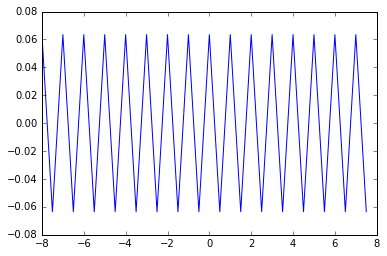

In [3]:
xmin = -1.
xmax = 1.
xres = 32
x = np.linspace(xmin, xmax, xres)

print(x)

fct = lambda x, X : x == X

f = fct(x, x[len(x)//2])
print(f)
y, F = fft(x, f)

#plt.plot(x, np.abs(f))
print(F)
plt.plot(y, F.real)


-3.0 3.0 6.0 2.0 2.0
-0.333333333333 0.166666666667 0.5 0.166666666667 0.166666666667
0.333333333333 0.3333333333333333
(3.46410161514+0j)


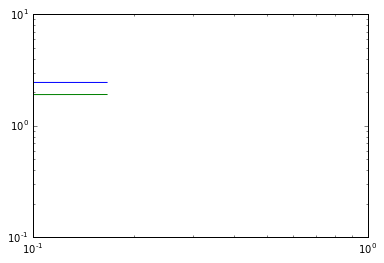

In [4]:
xmin = -3.
xmax = 3.
xres = 4
x = np.linspace(xmin, xmax, xres)

#fct = lambda x : 0.5 * (np.sign(x) + 1)
fct = lambda x : x > 0.

f = fct(x)
y, F = fft(x, f)
einh = np.exp(y*1j)/(y*1j+(y==0))

print(xmin, xmax,  (xmax-xmin),  (xmax-xmin)/(xres-1),  x[1]-x[0])
print(y[0], y[-1], (y[-1]-y[0]), (y[-1]-y[0])/(xres-1), y[1]-y[0])
print((x[1]-x[0])*(y[1]-y[0]), 1/(xres-1))

print(F[len(F)//2] / einh[len(F)//2])

plt.plot(y, np.abs(F), y, np.abs(einh)/np.pi)
plt.xscale('log')
plt.yscale('log')


8.0
8.0
1.0


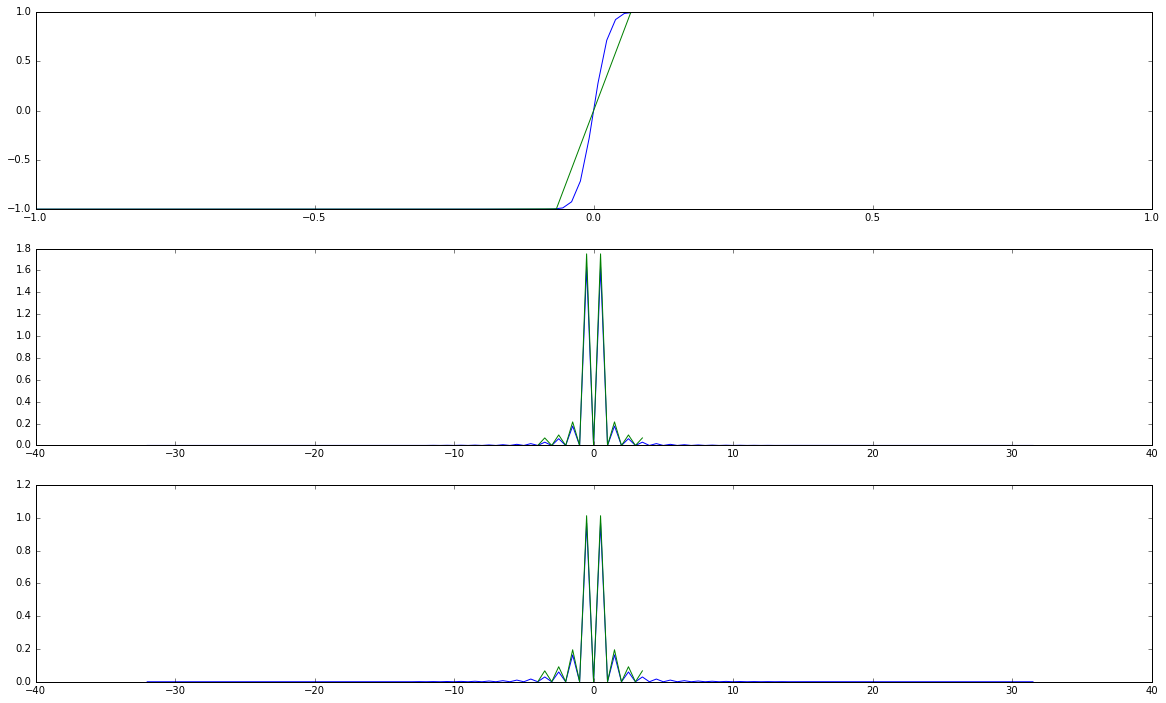

In [5]:
xmin = -1.
xmax = 1.
x1 = np.linspace(xmin, xmax, 128)
x2 = np.linspace(xmin, xmax, 16)

#fct = lambda x : np.sin(0*np.pi*x)
fct = lambda x : special.erf(32*x)
#fct = lambda x : x*0 +1
f = fct(x)
#plt.plot(x,f)

fig = fft_plot(x1, fct, x2, fct)

s = total_signal(fct(x), x[1]-x[0])
y, g = fft(x, fct(x))
S = total_signal(g, y[1]-y[0])

print(s)
print(S)
print(S/s)

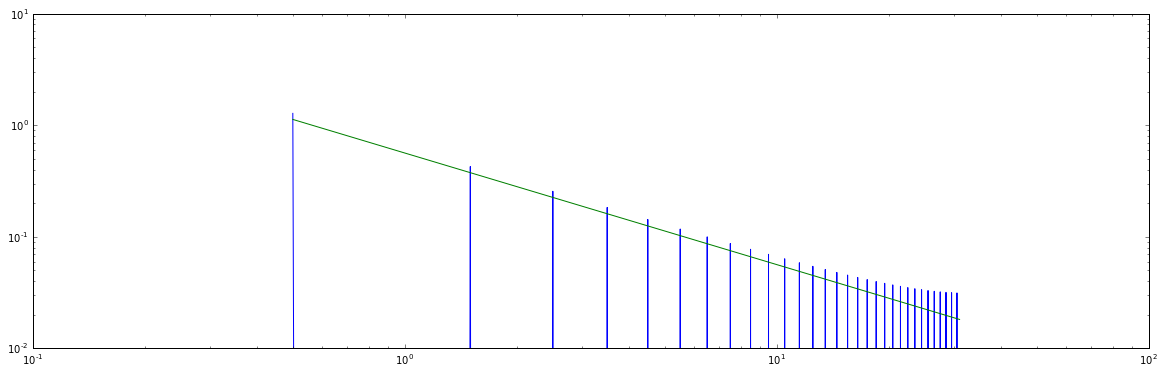

In [6]:
xmin = -1.
xmax = 1.
n = 128
x = np.linspace(xmin, xmax, n)

#fct = lambda x : special.erf(16*x)
fct = lambda x : np.sign(16*x)

f = fct(x)

y, g = fft(x, f)

h = 1./np.sqrt(np.pi)/(y*(y!=0)+(y==0))**1

fig = plt.figure(figsize=(20, 6))
sub = fig.add_subplot(1, 1, 1)
plt.plot(y[n//2+1:-1], np.abs( g )[n//2+1:-1])
plt.plot(y[n//2+1:-1], np.abs( h )[n//2+1:-1])
sub.set_xscale('log')
sub.set_yscale('log')

#plt.plot(y[n//2+1:-1], np.abs(g)[n//2+1:-1], y[n//2+1:-1], np.abs(h)[n//2+1:-1])


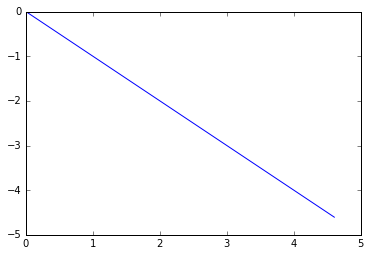

In [7]:
xmin = 1.
xmax = 100.
n = 128
x = np.linspace(xmin, xmax, n)
f = 1./x
plt.plot(np.log(x), np.log(f))

### Understanding the error function
*scipy.special.erf* is defined as:
\begin{equation}
erf(x) = \frac{2}{\sqrt{\pi}} \int_{-\infty}^{x}{e^{-x'^2}\mathrm{d}x'}
\end{equation}

This is - sloppily - shown by taken the numerical derivative of *scipy.special.erf* and comparing it to the function under the integral:

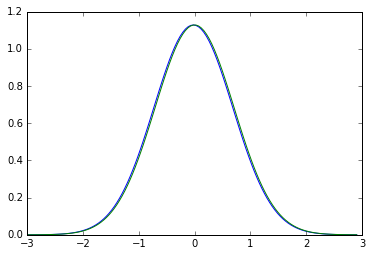

In [74]:
Fct = special.erf
fct = lambda x : 2./np.sqrt(np.pi)*np.exp(-x**2)

xmin = -3.
xmax = 3.
xres = 128
x = np.linspace(xmin, xmax, xres)

plt.plot(x[0:-2], (Fct(x[1:-1])-Fct(x[0:-2]))/(x[1]-x[0]), x[0:-2], fct(x[0:-2]))

### The error function's Fourier transform
This function's Fourier transform is (?):

\begin{equation}
\tilde{erf}(\omega) = \frac{1}{\mathrm{i}\omega} \frac{2}{\sqrt{\pi}} e^{-\frac{\omega^2}{4}}
\end{equation}

This form cannot be confirmed by the numerical FFT:

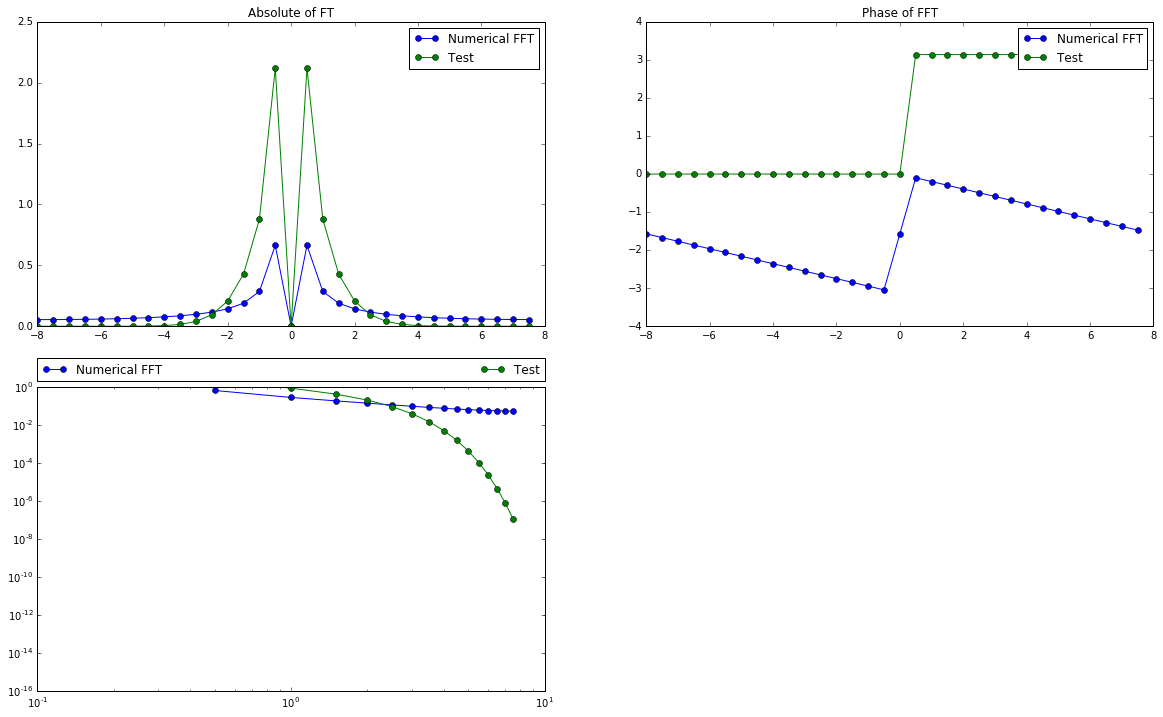

In [101]:
Fct = lambda x, a : special.erf(a*x)
test = lambda w : (w!=0)*(-2.j)/(w + (w==0))/np.sqrt(np.pi) * np.exp(-w**2 / 4)

def phase(x):
    return np.arctan2(x.real, x.imag)

xmin = -1.
xmax = 1.
xres = 32
x = np.linspace(xmin, xmax, xres)

f = Fct(x, 1)

w, fft_f = fft(x, f, usenorm='density')

fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(2, 2, 1)
sub1.plot(w, np.abs(fft_f), marker='o', label='Numerical FFT')
sub1.plot(w, np.abs(test(w)), marker='o', label='Test')
sub1.set_title('Absolute of FT')
sub1.legend()

sub2 = fig.add_subplot(2, 2, 2)
sub2.plot(w, phase(fft_f), marker='o', label='Numerical FFT')
sub2.plot(w, phase(test(w)), marker='o', label='Test')
sub2.set_title('Phase of FFT')
sub2.legend()

sub4 = fig.add_subplot(2, 2, 3)
sub4.loglog(w, np.abs(fft_f), marker='o', label='Numerical FFT')
sub4.loglog(w, np.abs(test(w)), marker='o', label='Test')
sub4.set_ylim([1e-16, 1])
sub4.set_title('Absolute of FFT')
sub4.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
#sub6.set_ylim([1e-16, 1])


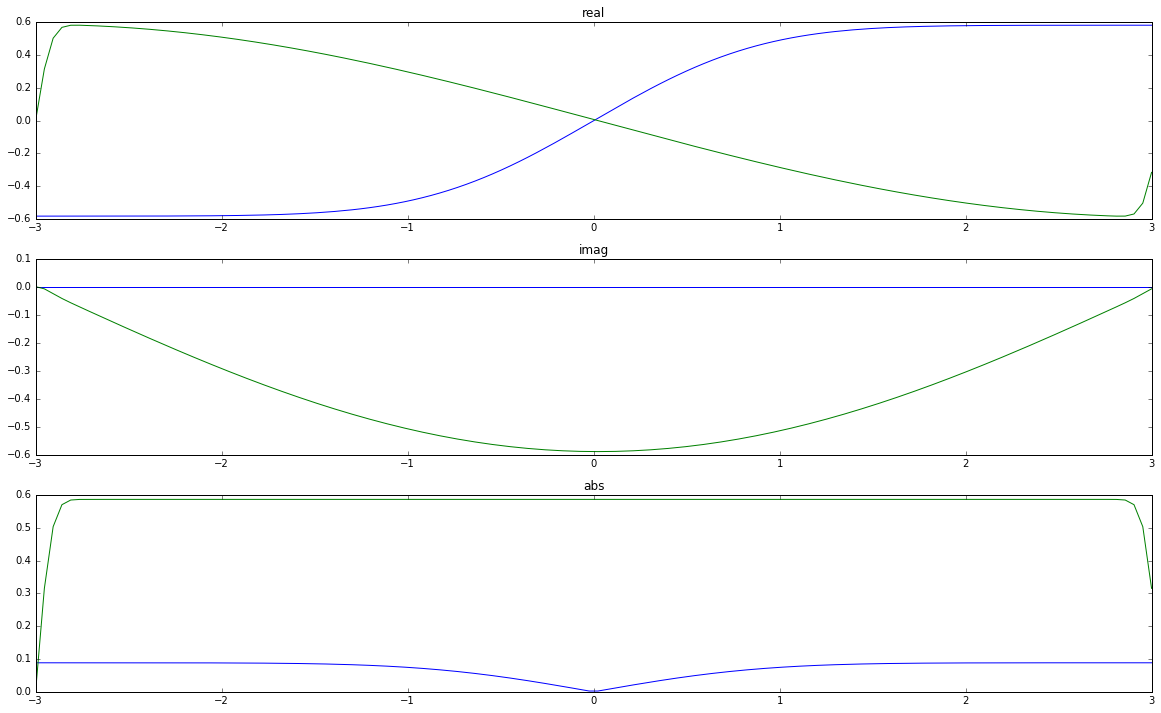

In [98]:
Fct = special.erf
test = lambda w : (w!=0)*(-2.j)/(w + (w==0))/np.sqrt(np.pi) * np.exp(-w**2)

xmin = -3.
xmax = 3.
xres = 128
x = np.linspace(xmin, xmax, xres)

f = Fct(x)
w, fft_f = fft(x, f)

ifft_fft_f = np.fft.ifftshift(fft_f)
ifft_fft_f = np.fft.ifft(ifft_fft_f)

t = test(x)

ifft_t = np.fft.ifftshift(t)
ifft_t = np.fft.ifft(ifft_t)

tmax = np.max(np.abs(np.real(ifft_t)))
fmax = np.max(np.abs(np.real(ifft_fft_f)))

fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(3, 1, 1)
sub1.plot(x, np.real(ifft_fft_f)*tmax/fmax)
sub1.plot(x, np.real(ifft_t))
sub1.set_title('real')

sub2 = fig.add_subplot(3, 1, 2)
sub2.plot(x, np.imag(ifft_fft_f))
sub2.plot(x, np.imag(ifft_t))
sub2.set_title('imag')

sub3 = fig.add_subplot(3, 1, 3)
sub3.plot(x, np.abs(ifft_fft_f))
sub3.plot(x, np.abs(ifft_t))
sub3.set_title('abs')


/opt/pkg/devel/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


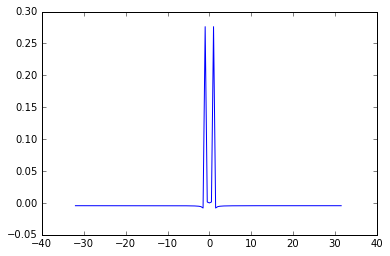

In [97]:
# Sine in window

theta = lambda x : 0.5 * (1 + np.sign(x))

xmin = -1.
xmax = 1.
xres = 128
x = np.linspace(xmin, xmax, xres)

fct = lambda x, a : np.sin(2*np.pi*x)*theta(x+a)*theta(-x+a)

f = fct(x, 1)
w, fft_f = fft(x, f)

plt.plot(w, fft_f)

ValueError: x and y must have same first dimension

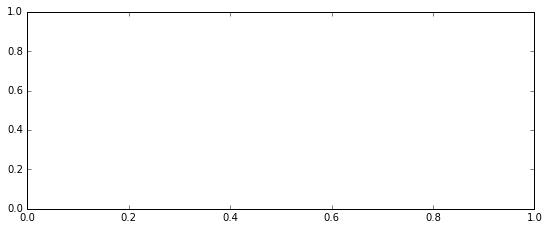

In [99]:
xmin = -1.
xmax = 1.
xres = 128
x = np.linspace(xmin, xmax, xres)

f = theta(x)

fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(3, 2, 1)
sub1.plot(x, theta)